# Regularization in Machine Learning

Regularization is a technique used to prevent overfitting by adding a penalty to the loss function. In linear models, overfitting can occur when the model becomes too complex and captures noise rather than the actual relationship in the data. Regularization simplifies the model by discouraging large coefficients.

There are two common types of regularization:

- **L1 Regularization (Lasso)**
- **L2 Regularization (Ridge)**

## L1 Regularization (Lasso)

L1 regularization adds a penalty equivalent to the sum of the absolute values of the coefficients. The cost function with L1 regularization can be written as:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 + \lambda \sum_{j=1}^{n} |\theta_j|
$$

Where:
- $m$ is the number of data points,
- $h_\theta(x^{(i)})$ is the predicted value from the model,
- $y^{(i)}$ is the actual target value,
- $\theta_j$ are the model coefficients,
- $\lambda$ is the regularization parameter.

L1 regularization tends to create sparse models, meaning that it pushes some coefficients to exactly zero, which can help with feature selection.

## L2 Regularization (Ridge)

L2 regularization adds a penalty equivalent to the sum of the squared values of the coefficients. The cost function with L2 regularization can be written as:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 + \lambda \sum_{j=1}^{n} \theta_j^2
$$

L2 regularization penalizes large coefficients more severely than L1 regularization but does not push coefficients to exactly zero. It tends to shrink the coefficients, leading to a smoother model.

## Choosing Between L1 and L2 Regularization

- **L1 Regularization (Lasso)**: 
  - Use when you suspect that many of the features are not important. L1 helps by pushing some coefficients to zero, effectively performing feature selection.
  - Suitable for problems with high dimensionality (many features), as it reduces the number of features used in the model.
  
- **L2 Regularization (Ridge)**: 
  - Use when all features are potentially useful, but you want to avoid overfitting by shrinking coefficients.
  - L2 is less aggressive than L1 in forcing coefficients to zero, so it retains more features.

## Combined Regularization: Elastic Net

Elastic Net combines both L1 and L2 regularization. It can be useful when you need the sparsity of L1 regularization along with the stability of L2. The cost function is:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 + \lambda_1 \sum_{j=1}^{n} |\theta_j| + \lambda_2 \sum_{j=1}^{n} \theta_j^2
$$

Where $\lambda_1$ controls the L1 penalty and $\lambda_2$ controls the L2 penalty.

## Python Example: Comparing L1 and L2 Regularization

Below is a Python example showing how L1 (Lasso) and L2 (Ridge) regularization behave with a linear regression model.


Lasso Coefficients: [ 8.0597371   5.56835544  0.41862789 -0.05692435 -0.        ]
Ridge Coefficients: [ 8.13479723  5.68049171  0.51907674 -0.17971932 -0.01243163]
Lasso Non-zero Coefficients: 4 out of 5
Ridge Non-zero Coefficients: 5 out of 5
Lasso MSE: 4.154842754621377
Ridge MSE: 4.633592227031649


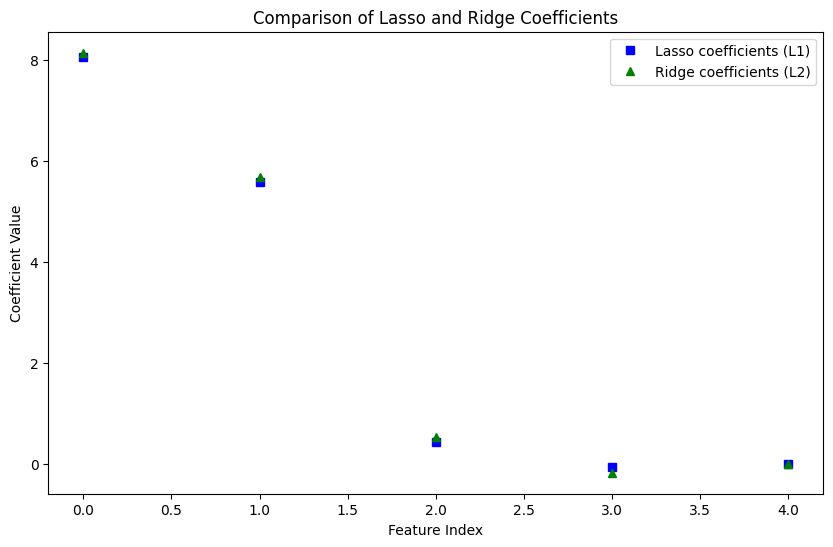

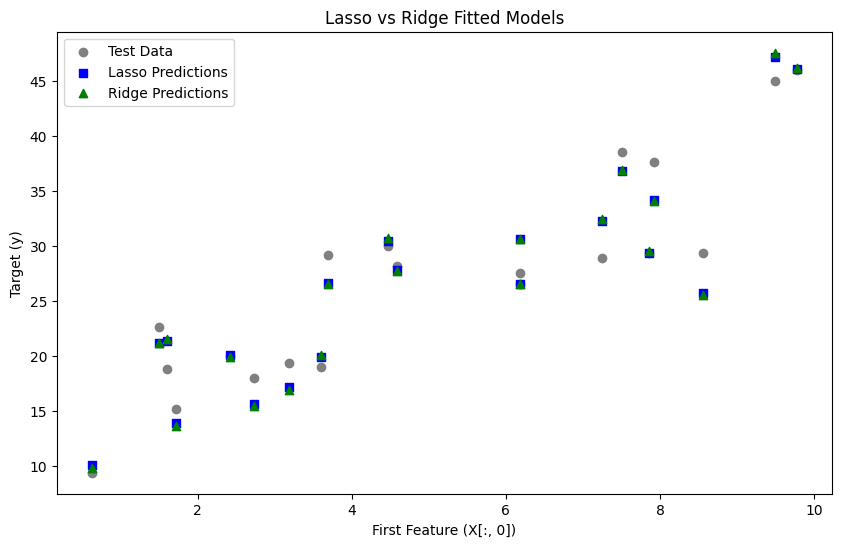

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 5) * 10  # 100 samples, 5 features
y = 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(100) * 2  # linear relationship with noise

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the data (important for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit L1 (Lasso) and L2 (Ridge) models
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)

lasso.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)

# Calculate number of non-zero coefficients
lasso_non_zero = np.sum(lasso.coef_ != 0)
ridge_non_zero = np.sum(ridge.coef_ != 0)

# Print model coefficients and MSE
print("Lasso Coefficients:", lasso.coef_)
print("Ridge Coefficients:", ridge.coef_)
print(f"Lasso Non-zero Coefficients: {lasso_non_zero} out of {X.shape[1]}")
print(f"Ridge Non-zero Coefficients: {ridge_non_zero} out of {X.shape[1]}")

print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))

# Plot the results (Coefficient Comparison)
plt.figure(figsize=(10, 6))
plt.plot(lasso.coef_, 's', label="Lasso coefficients (L1)", color='blue')
plt.plot(ridge.coef_, '^', label="Ridge coefficients (L2)", color='green')
plt.title("Comparison of Lasso and Ridge Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.show()

# Plot the fitted models on test data
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color='gray', label="Test Data")
plt.scatter(X_test[:, 0], y_pred_lasso, color='blue', label="Lasso Predictions", marker='s')
plt.scatter(X_test[:, 0], y_pred_ridge, color='green', label="Ridge Predictions", marker='^')
plt.title("Lasso vs Ridge Fitted Models")
plt.xlabel("First Feature (X[:, 0])")
plt.ylabel("Target (y)")
plt.legend()
plt.show()
